<a href="https://colab.research.google.com/github/samyzaf/kerutils/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Simple Neural Network<BR>for Digit Recognition with Keras

<a href="http://yann.lecun.com/exdb/mnist">
<img src="https://samyzaf.com/ML/mnist/mnist1.jpg" style="max-width: 95%;">
</a>

**Original author: Xavier Snelgrove**
<br/>
** Additions and modifications: Samy Zafrany**

This is originally a simple quick-start in performing digit recognition in a neural network in Keras,
for a short tutorial at the University of Toronto.
Some more elaborations and modifications were added later by
[Samy Zafrany](http://www.samyzaf.com).
It is largely based on the `mnist_mlp.py` example from the Keras source.
<br/>
Official site: http://yann.lecun.com/exdb/mnist/


In [ ]:
%pip install -q https://samyzaf.com/kerutils.zip
from kerutils import *
from keras.datasets import mnist
plt.rcParams['figure.figsize'] = (6,6)
%matplotlib inline
np.set_printoptions(threshold=sys.maxsize, linewidth=200)

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


## Download Prerequisites

To run the code in this notebook, we need the **kerutils**
package which can be downloaded or installed from
https://samyzaf.com/kerutils.zip.

Or you can download everything in one zip file from the github repository:
https://github.com/samyzaf/kerutils

First let's source a good looking notebok style css:

Installing and configuring your graphics card for TensorFlow (or Theano) can be a bit daunting,
but is not essential for running this notebook (it will simply run slowly on you CPU)

## Load training and validation data

In [ ]:
num_classes = 10

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
x_train original shape (60000, 28, 28)
y_train original shape (60000,)


In [ ]:
# What is the type of x_train ?

type(x_train)

numpy.ndarray

OK, this is a standard Numpy matrix, which is good for Keras

In [ ]:
# How big is X_train ?

len(x_train)

60000

So our training data set consists of 60 thousands images of hand written digits (each image in a 28x28 pixmap form).
The y_train vector maps each numeral instance to its proper class: 0, 1, 2, ..., 9
<IMG src="https://samyzaf.com/ML/mnist/mnist2.jpg" style="max-width: 75%;" />

In [ ]:
# View of the first 20 classes in y_train

print(y_train[0:20])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [ ]:
print(len(x_test), len(y_test))

10000 10000


In [ ]:
print("test0 = \n%s\n\n class = %s" % (x_test[0], y_test[0]))

test0 = 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 198 198 1

Although the digit '7' is somewhat visible in this matrix,
generally looking at a 28x28 matrix is not a pleasant experience.
It is much better if we draw it as an image.
Here is a matplotlib code for drawing this matrix as a 28x28 image.

Text(0.5, 1.0, 'Class 7')

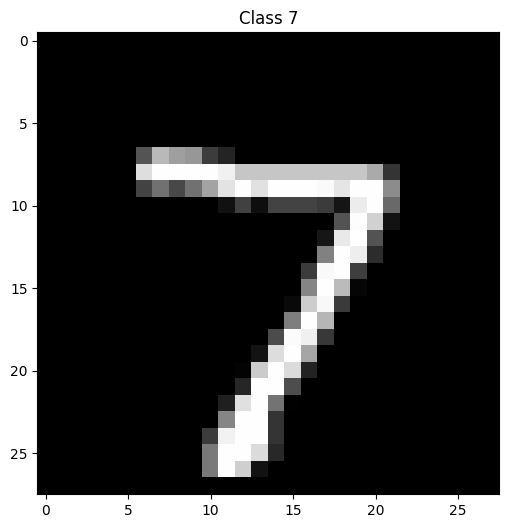

In [ ]:
plt.imshow(x_test[0], cmap='gray', interpolation='none')
plt.title("Class {}".format(y_test[0]))

Let's look at some more examples of the training data.
We will use the same code in a loop for displaying 15 images in a 3x5 grid:

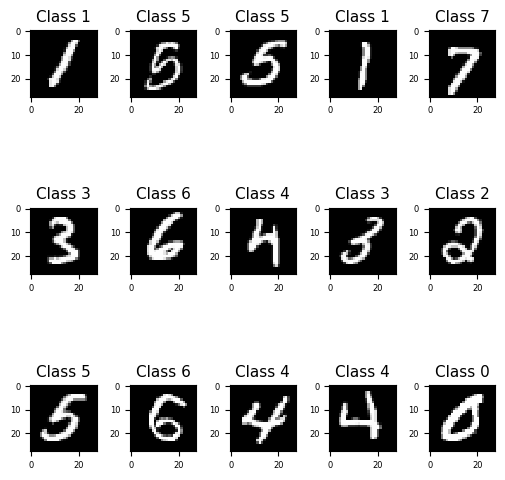

In [ ]:
n = 835 # just a random pick
for i in range(0, 15):
    plt.subplot(3,5,i+1)
    plt.imshow(x_train[n+i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[n+i]), fontsize=11)
    plt.tick_params(axis='both', which='major', labelsize=6)
    plt.subplots_adjust(hspace=0.65, wspace=0.5)

## Format the data for training
Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector. We'll also scale the inputs to be in the range [0-1] rather than [0-255]

In [ ]:
X_train = x_train.reshape(60000, 784)
X_test = x_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [ ]:
#Example of one training vector
print("Example of one training vector")
print(X_train[0])

Example of one training vector
[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.

Again, this is a 784 (28x28) long vector which is the former 28x28 matrix squashed to one line.
We need to modify the target matrices to be in the one-hot format, i.e.

<pre>
0 &rarr; [<b>1</b>, 0, 0, 0, 0, 0, 0, 0, 0]
1 &rarr; [0, <b>1</b>, 0, 0, 0, 0, 0, 0, 0]
2 &rarr; [0, 0, <b>1</b>, 0, 0, 0, 0, 0, 0]
3 &rarr; [0, 0, 0, <b>1</b>, 0, 0, 0, 0, 0]
etc...
</pre>

In [ ]:
Y_train = to_categorical(y_train, num_classes)
Y_test = to_categorical(y_test, num_classes)

In [ ]:
# Let's look at the first 20 elements of Y_train

print(Y_train[0:19])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


# Build the neural network
Build the neural-network.
Here we'll do a simple 3 layer fully connected network ("Dense").
We will also apply a **Dropout** technique to combat the overfitting phenomenon during training.
This technique has been suggested in a 2014 paper and has been widely adopted since then.
<br/>
http://jmlr.org/papers/v15/srivastava14a.html
<br/>
Aditional source on Dropout:
<br/>
http://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras

In our first model, Dropout is applied between the input layer to the hidden layer
and then between the hidden layer and the output layer.
The dropout rate of 20% to 50% seems to fit in many practical cases.

The activation parameter is discussed in our the
[**Pima Indian Diabetes Database**](https://github.com/samyzaf/kerutils/blob/master/pima.ipynb)
unit.  
<img src="https://samyzaf.com/ML/mnist/model1.png" align="LEFT" width=300/>

In [ ]:
model1 = Sequential()
model1.add(Dense(512, input_shape=(784,), activation='relu'))
model1.add(Dropout(0.25))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.25))
model1.add(Dense(10, activation='softmax'))
# This special "softmax" activation among other things, ensures the output is
# a valid probaility distribution, that is that its values are all
# non-negative and sum to 1.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the model
Keras is built on top of Theano (and now TensorFlow as well),
both packages that allow you to define a **computation graph** in Python,
which they then compile and run efficiently on the **CPU** or **GPU** without
the overhead of the Python interpreter.

When compiling a model,
Keras asks you to specify your **loss function** and your **optimizer**.
These functions are discussed in more detail in the
[**Pima Indian Diabetes Database**](http://www.samyzaf.com/ML/pima/pima.html)
unit.
The loss function that we will use here is called **categorical crossentropy**,
and is a loss function well-suited for comparing two probability distributions.

The neural network output vector represents probability distributions across the ten different digits
(e.g. "we're 78% confident this image is a 3, 12% sure it's an 8, 5% it's a 2, etc."),
and the target is a probability distribution with 100% for the correct category,
and 0 for everything else.
The cross-entropy is a measure of how different your predicted distribution is from the target distribution.
[More detail at Wikipedia](https://en.wikipedia.org/wiki/Cross_entropy)

The optimizer helps determine how quickly the model learns,
how resistant it is to getting "stuck" or "blowing up".
We will not discuss this in too much detail,
but "adam" is often a good choice (developed at Univ. of Toronto).

In [ ]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

## Train the model !
This is the fun part: you can feed the training data loaded in earlier into this model and it will learn to classify digits.
Note that the fit method returns a history object which logs the various loss/accuracy values across the training flow. See the following example on how to use it for inspecting the model.

In [ ]:
h1 = model1.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=4,
    verbose=1,
    validation_data=(X_test, Y_test),
)

Epoch 1/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8870 - loss: 0.3718 - val_accuracy: 0.9655 - val_loss: 0.1060
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9642 - loss: 0.1144 - val_accuracy: 0.9766 - val_loss: 0.0696
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9744 - loss: 0.0799 - val_accuracy: 0.9749 - val_loss: 0.0855
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9780 - loss: 0.0681 - val_accuracy: 0.9779 - val_loss: 0.0758


## Finally, evaluate its performance

In [ ]:
loss1, accuracy1 = model1.evaluate(X_test, Y_test, verbose=0)
print("Validation: accuracy1 = %f  ;  loss1 = %f" % (accuracy1, loss1))

Validation: accuracy1 = 0.977900  ;  loss1 = 0.075793


In [ ]:
loss1, accuracy1 = model1.evaluate(X_train, Y_train, verbose=0)
print("Training: accuracy1 = %f  ;  loss1 = %f" % (accuracy1, loss1))

Training: accuracy1 = 0.988750  ;  loss1 = 0.035021


## Inspecting the output

Not bad: 98.76% training accuracy, and 97.78% training accuracy on our first simple model
is a good start!
It's always a good idea to inspect the model output and make sure it looks sane.
It is also a good practice to look at some examples it gets right, and some examples it gets wrong.
A more thorough inspection is obtained by looking at the progress graphs
of training and validation accuracy values.
The **view_acc** function ("view accuracy") is currently part of the
[kerutils module](http://www.samyzaf.com/cgi-bin/view_file.py?file=ML/lib/kerutils.py)
(look above for download links).

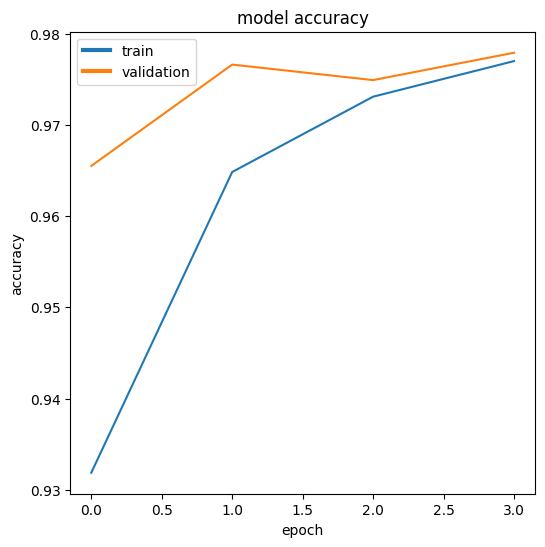

In [ ]:
# Training accuracy and validation accuracy graphs

view_accuracy(h1)

A similar function for viewing the model loss history is **view_loss**

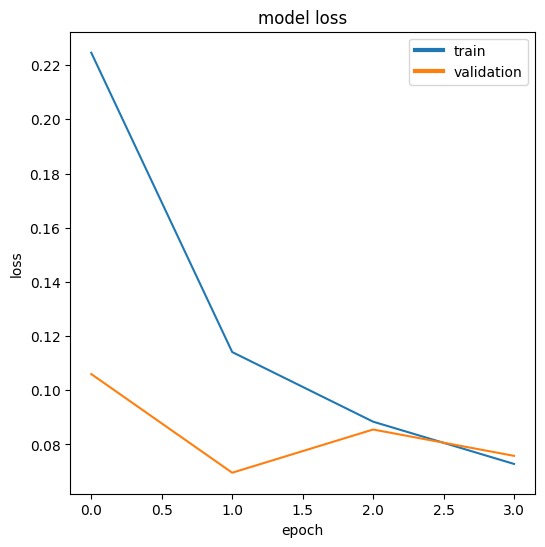

In [ ]:
view_loss(h1)

In [ ]:
# The predict method outputs the highest probability class
# according to the trained classifier for each input example.

x_pred = model1.predict(X_test)
y_pred = np.argmax(x_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
# Check which items we got right / wrong

true_indices = np.nonzero(y_pred == y_test)[0]
false_indices = np.nonzero(y_pred != y_test)[0]
print("Number of false predictions = %d (out of %d samples)" % (len(false_indices), len(y_test)))

Number of false predictions = 221 (out of 10000 samples)


Take a look at the following 32 samples as processed by model1.
The first 16 samples were correctly identified by our model1, while the other 16 samples where missed by it.
But look how close it was to identify them (almost like a "human" error).

Total number of false items = 221 out of 10000


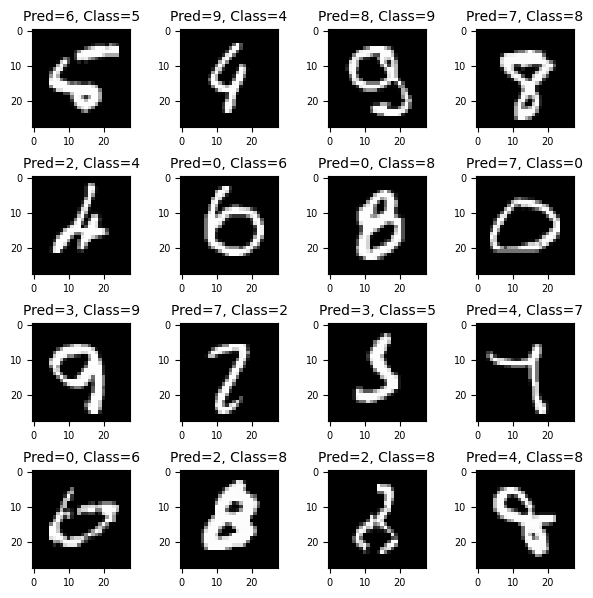

In [ ]:
# This function draws 9 correctly predicted cases vs. 9 incorrect cases

def view_false_samples(X, y, y_pred, n):
    false_indices = np.nonzero(y_pred != y)[0]
    print("Total number of false items = %d out of %d" % (len(false_indices), len(y)))
    plt.figure(figsize=(7,7))
    for i, incorrect in enumerate(false_indices[n:n+16]):
        plt.subplot(4,4,i+1)
        plt.imshow(X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
        plt.title("Pred={}, Class={}".format(y_pred[incorrect], y[incorrect]), fontsize=10)
        plt.tick_params(axis='both', which='major', labelsize=7)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.show()

view_false_samples(X_test, y_test, y_pred, 0)

As you can see, the errors that model1 made are almost "human" in most of the cases.
Let's see if we can build a better model.

## Second Keras Model (based on Convolution)
It turns out that in most practcal cases, Keras **Dense layers**
(fully connected layers) are a bad choice for image data sets.
They may work OK for small 28x28 images but are impractical for real
size images like a 1024x1024 image which requires 1 milion neurons
input layer and $10^{12}$ synapses for a Dense layer on top of it (with the same size).
In a **convolutional layer**, each neuron is connected to a very small subset of neurons, that represent pixels in its local area (usuall 3x3 or 5x5 windows in its neighborhood).
The rational is that an image pixel is more likely to be impacted by the 3x3 or 5x5
pixels around it and not by any pixel which is far away from it.

This is not the place to go into more details, but a decent quick introduction to
convolutional layers can be picked from this course:
</b>
http://cs231n.github.io/convolutional-networks

In the **mnist** case we will not gain much precision since our images are small and convolutional layers in such case hardly matter.
But it's good to get acquainted with the technology.

Let's start by reloading our mnist data and define the required parameters
for our convolutional layers.

In [ ]:
# Number of classes (digits)
num_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

# number of convolutional filters to use
nb_filters = 128

# size of pooling area for max pooling
pool_size = (2, 2)

# convolution kernel size
kernel_size = (3, 3)

# Loading the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)

X_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
X_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')  # use less memory
X_test = X_test.astype('float32')    # use less memory
X_train /= 255
X_test /= 255
Y_train = to_categorical(y_train, num_classes)
Y_test = to_categorical(y_test, num_classes)
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

x_train original shape (60000, 28, 28)
y_train original shape (60000,)
Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


Here is the second model definition:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.9051 - loss: 0.2973 - val_accuracy: 0.9867 - val_loss: 0.0421
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9832 - loss: 0.0563 - val_accuracy: 0.9898 - val_loss: 0.0315
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9887 - loss: 0.0375 - val_accuracy: 0.9906 - val_loss: 0.0291
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9892 - loss: 0.0328 - val_accuracy: 0.9903 - val_loss: 0.0310
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9924 - loss: 0.0236 - val_accuracy: 0.9892 - val_loss: 0.0332
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9922 - loss: 0.0242 - val_accuracy: 0.9903 - val_loss: 0.0394
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9940 - loss: 0.0194 - val_accuracy: 0.9925 - val_loss: 0.0277
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9937 - loss: 0.0193 - 

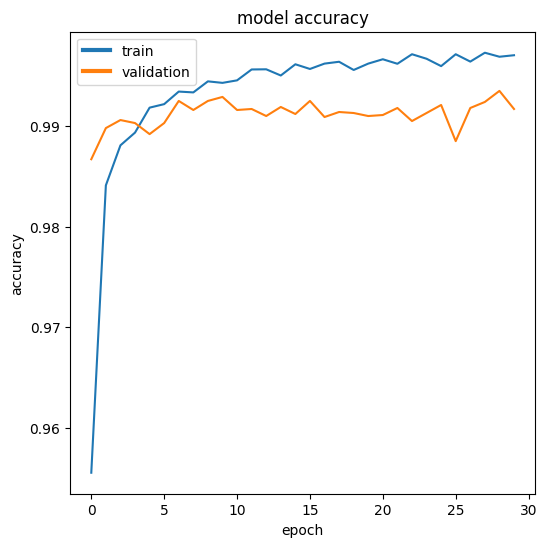

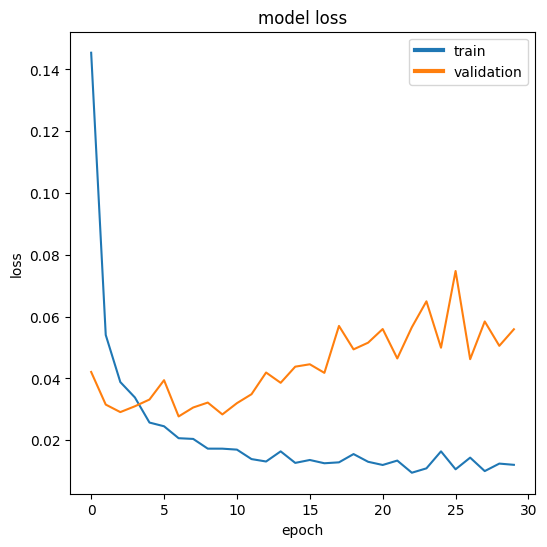

In [ ]:
model2 = Sequential()
model2.add(Convolution2D(nb_filters, (3, 3), padding='valid', input_shape=input_shape))
model2.add(PReLU())
model2.add(Convolution2D(nb_filters, (3, 3)))
model2.add(PReLU())
model2.add(MaxPooling2D(pool_size=pool_size))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(256))
model2.add(PReLU())
model2.add(Dropout(0.5))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

from keras.optimizers import SGD
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

h = model2.fit(
    X_train,
    Y_train,
    batch_size=64,
    epochs=30,
    verbose=1,
    validation_data=(X_test, Y_test),
)

#model2.save("model_2.h5")
show_scores(model2, h, X_train, Y_train, X_test, Y_test)

In [ ]:
loss, accuracy = model2.evaluate(X_train, Y_train, verbose=0)
print("Training: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Training: accuracy = 0.999717  ;  loss = 0.000999


In [ ]:
loss, accuracy = model2.evaluate(X_test, Y_test, verbose=0)
print("Validation: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Validation: accuracy = 0.991700  ;  loss = 0.055920


Indeed, using convolutional layers has yielded with better accuracy levels.
The training accuracy 99.97% is pretty good.
The validation accuracy 99.17% is almost practical,
at least for police camera control and toll roads detection cameras
(in which vehicle registration plate digits are expected to behave better than hand written
digits ...).  
<IMG src="http://samyzaf.com/ML/mnist/plate.jpg" align="LEFT" width=400 />

In [ ]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.

pred = model2.predict(X_test)
y_pred = np.argmax(pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [ ]:
# Check which items we got right / wrong

true_indices = np.nonzero(y_pred == y_test)[0]
false_indices = np.nonzero(y_pred != y_test)[0]

In [ ]:
print("success samples: %d, failed samples: %d" % (len(true_indices), len(false_indices)))

success samples: 9917, failed samples: 83


Out of 10000 training images, 83 samples have been missed
by our model.
Let's take a look at some of them to try to understand
why they were so hard to catch?

Total number of false items = 83 out of 10000


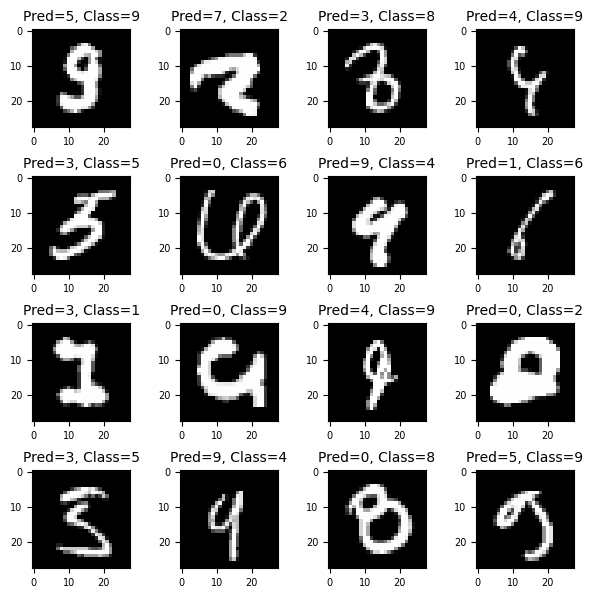

In [ ]:
view_false_samples(X_test, y_test, y_pred, 20)

Just by looking at the last 16 false results, it looks like as if our model is almost "human"-like in missing them and identify them with closely looking numerals. In some of these cases look too vague to be recognized even by a real human eye.
Improving the 99.61% precision score will probably require more training instances, or maybe more refined network architectures (like the Keras graph models).
We may later formulate some challenges of this sort as course projects.

For further improvements it's recommended to look at Keras **ImageDataGenerator** which helps
in generating new training samples from the old samples by using image processing techniques.
Here is a good tutorial on how to do it on the mnist data set:
<br/>
http://machinelearningmastery.com/image-augmentation-deep-learning-keras/

This technique is demonstrated in the
[**CIFAR10** image data set](https://github.com/samyzaf/kerutils/blob/master/cifar10.ipynb)
at a later study unit in this course.

There are lots of other great examples at the Keras homepage at http://keras.io
and in the source code at https://github.com/fchollet/keras